# Исследование недвжимости в Санкт-Петерубруге

**Объект исследования:** 

данные сервиса Яндекс Недвижиость - архив объявлений о продаже квартир в Санкт-Петербурге и соседних начеленных пунктах за несколько лет.

**Цель исследования:**
* научиться определять рыночную стоимость объектов недвжимости
* установить параметры для отслеживания аномалий

**Ход исследования:**
1. Обзор данных
2. Предобработка данных
3. Добавление расчётов в таблицу
4. Выполнение исследовательского анализа данных:
* исследование параметров: площадь, цена, число комнат, высота потолков
* изучение времени продажи
* обработка выбивающихся значений и анамлий
* изучение факторов, влияющих на конечную стоимость
* выделение сегмента квартир в центре. анализ данной территории
5. Подведение итогов исследовательского анализа данных


## Обзор данных

Импортируем нужные библиотеки

In [1]:
#для создания таблицы с пропусками
import numpy as np
#для работы с таблицами
import pandas as pd
#для работы с математическими функциями
import matplotlib.pyplot as plt
#для создания графиков
import seaborn as sns
#отключение предупреждений в Юпитере
import warnings
warnings.filterwarnings('ignore') 
#для разичных путей открытия файла
import os

Прочитаем файл от заказачика:

In [2]:
# Сохранили файл в переменной 'data'
# Применили конструкцию 'try-except' для отработки ошибок при открытии файла
# В качестве разделителя указали знак табуляции '\t'
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except: 
    data = pd.read_csv('real_estate_data.csv', sep='\t')

Изучим общую информацию о таблице:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Соотнесем названия колонок с техническим описанием таблицы:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Проверим, корректно ли отображатеся таблица, выведем первые 5 строк:

In [4]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
total_images,20,7,10,0,2,10,6,5,20,18
last_price,13000000.0,3350000.0,5196000.0,64900000.0,10000000.0,2890000.0,3700000.0,7915000.0,2900000.0,5400000.0
total_area,108.0,40.4,56.0,159.0,100.0,30.4,37.3,71.6,33.16,61.0
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00,2018-09-10T00:00:00,2017-11-02T00:00:00,2019-04-18T00:00:00,2018-05-23T00:00:00,2017-02-26T00:00:00
rooms,3,1,2,3,2,1,1,2,1,3
ceiling_height,2.7,NaN,NaN,NaN,3.03,NaN,NaN,NaN,NaN,2.5
floors_total,16.0,11.0,5.0,14.0,14.0,12.0,26.0,24.0,27.0,9.0
living_area,51.0,18.6,34.3,NaN,32.0,14.4,10.6,NaN,15.43,43.6
floor,8,1,4,9,13,5,6,22,26,7
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим распредление значений в таблице:

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Итак, первичный анализ данных показал следующее:
в таблице более 23000 строк, и 22 столбца, типы данных:
* `int64` 
*`float64`
*`object`
*`bool`   

В талице есть следющие недочеты:

1. Нарешение стиля в названиях столбцов.
2. В более чем половине столбцов есть пропущенные значения.
3. В некоторых столбцах есть анамалии в виде неправдподобно больших или малых значений.
3. Типы данных для большинства столбцов выбраны некорректно.
              

### Выводы:  <a class="tocSkip">
В исходной таблице есть недочёты в виде пропущенных значений, дубликатов, аномалий и т.п., для ответов на поставленные вопросы в цели задачи данным требуется предобработка

##  Предобработка данных 

### Оформление таблицы

В названиях столбцов есть расхождению по стилю, а также часть из них можно улучшить, сделав названия более лаконичными:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data = data.rename(columns={'first_day_exposition': 'publication_date',  
                            'cityCenters_nearest': 'center_nearest',})

Для дальнешйшей работы часть столбцов нам не пондаобиться, удалим их:

In [8]:
data = data.drop(['total_images', 'is_apartment', 'studio', 'open_plan', 'parks_around3000', 'ponds_around3000', 'airports_nearest', 'parks_nearest', 'ponds_nearest'], 1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   last_price        23699 non-null  float64
 1   total_area        23699 non-null  float64
 2   publication_date  23699 non-null  object 
 3   rooms             23699 non-null  int64  
 4   ceiling_height    14504 non-null  float64
 5   floors_total      23613 non-null  float64
 6   living_area       21796 non-null  float64
 7   floor             23699 non-null  int64  
 8   kitchen_area      21421 non-null  float64
 9   balcony           12180 non-null  float64
 10  locality_name     23650 non-null  object 
 11  center_nearest    18180 non-null  float64
 12  days_exposition   20518 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 2.4+ MB


Названия скорректированы, столбцы, которые не будут задействованы в исследовании удалены. Преступим к обработке пропущенных значений

### Обработка пропущенных значений

Что бы понимать сколько значений пропущено сформируем таблицу с колличеством проспуков и их процентом:

In [10]:
# объявим функцию, которая ищет явные пропуски, как None и Nan и невянвые, в виде пробелов
def nan_values(df,list_nans=['', ' ', '""', '" "', None, np.nan]):
    list_count=[]
    list_share=[]
# цикл, который считает сумму и процент пропусков
    for col in df.columns:
        list_count.append(sum(df[col].isin(list_nans)))
        list_share.append(round(sum(df[col].isin(list_nans)) * 100 / len(df), 2))
# создадим датафрейм с пропусками        
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': list_count,
                                     'percent_missing': list_share})
    return missing_value_df

Выведем получившуюся таблицу на экран:

In [11]:
missing_columns = nan_values(data)
#уберем колонки без пропусков
display(missing_columns[missing_columns['num_missing']>0]) 
#посчитаем колличство столбцов с пропусками
print('Столбцов с пропусками:', missing_columns[missing_columns['num_missing']>0].shape[0]) 


,column_name,num_missing,percent_missing
4,ceiling_height,9195,38.80
5,floors_total,86,0.36
6,living_area,1903,8.03
8,kitchen_area,2278,9.61
9,balcony,11519,48.61
10,locality_name,49,0.21
11,center_nearest,5519,23.29
12,days_exposition,3181,13.42


Столбцов с пропусками: 8


В 13 столбцах есть пропуски, выявим гипотезы об их происхождении и обработаем:

**floors_total** - всего этажей в доме. Пропущенно менее 1 % значений.

*Гиотпеза: обычно пользователи заполняют данные с колличеством этажей в доме, некоторые случайно пропускают данный пункт*

Начнём с этого параметра, т.к. будем его использовать для замен в других столбцах, изучим некоторые строки с пропусками:




In [12]:
data.loc[data['floors_total'].isna()].sample(frac=0.5).head()

,last_price,total_area,publication_date,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,center_nearest,days_exposition
8986,4850000.0,103.10,2018-07-10T00:00:00,3,NaN,NaN,68.10,4,16.70,NaN,NaN,31813.0,28.0
5958,3200000.0,30.30,2018-09-07T00:00:00,0,NaN,NaN,NaN,13,NaN,NaN,Санкт-Петербург,11618.0,68.0
10351,5380992.0,110.72,2015-10-09T00:00:00,4,NaN,NaN,80.39,4,NaN,0.0,поселок городского типа Токсово,NaN,251.0
13622,7650000.0,88.84,2016-05-21T00:00:00,3,NaN,NaN,49.87,21,9.76,0.0,Санкт-Петербург,14674.0,42.0
14526,5595000.0,52.47,2016-03-23T00:00:00,2,NaN,NaN,NaN,10,NaN,0.0,Санкт-Петербург,13266.0,90.0


Видим, что данные, в которых пропущено общее колличество этажей, не самые качественные, поскольку имеются пропуски и в других категориях, поэтому просто удалим, что бы лишний раз не "усреднять" общие данные

In [13]:
data = data.dropna(subset=['floors_total'])
len(data[data['floors_total'].isna()]) #проверка удалились ли пропуски

0

**ceiling_height**  - высота потолков (м). Пропущенно 38% процентов значений.

*Гипотеза: такой большой процент обусловлен тем, что люди обычно не знают точную высоту потолков и предпочитают не заполнять эти данные*

Жилые квартиры это как правило типовые застройки, которые имеют строгий регламент по всем параметрам, в том числе и по высоте потолков. Часто можно встретить абсолютно одинаковые дома, причем в совершенно разных частях города, которые отличаются разве что цветом. Достаточно вспомнить слова "Хрущёвки" и "Сталинки", которые вызывают разные ассоциации, но в первую очередь нас интересует их однотипность.

Посмотрим какая средняя высота потолков для домов, сгрупировав их по общему колличеству этажей:

In [14]:
# создадим сводную таблицу
floor_total_pivot = data.pivot_table(index = 'floors_total', values ='ceiling_height')
floor_total_pivot

,ceiling_height
floors_total,
1.0,2.740000
2.0,3.006791
3.0,2.969474
4.0,2.986831
5.0,2.793191
6.0,3.120743
7.0,2.946960
8.0,2.856818
9.0,2.599093


Видим, что высота потолков отличается, поэтому пропуски заменим на среднее значение по колличеству этажей в доме:

In [15]:
#делаем срез по данным с пропускам, заполняем средним значением по кол-ву этажей
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data.groupby('floors_total')['ceiling_height'].transform('mean')
#проверка удалились ли пропуски 
len(data[data['ceiling_height'].isna()]) 

1

1 значение не заполнилось, выведем строку с ним:

In [16]:
data[data['ceiling_height'].isna()]

,last_price,total_area,publication_date,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,center_nearest,days_exposition
11575,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,21.0,0.0,Санкт-Петербург,20444.0,53.0


Высота потолков не была заполнена, т.к. это уникальное 33 этажное здание, выполним для него отдельную замену, на основе среднего по всем квартирам:

In [17]:
data['ceiling_height'] =  data['ceiling_height'].fillna(data['ceiling_height'].mean())
len(data[data['ceiling_height'].isna()]) 

0

**living_area** - жилая площадь (м²), пропущено 8% значений.

*Гипотеза: по аналогии с высотой потолков, не каждый пользователь значет точную площадь помещения и предпочитает пропустить данный пункт. Так как он более весомый по сравнению с высотой потолков, проущенных значний меньше* 

Для замены пропусков будем использовать медианные значения, на основе известной величины `total_area`



Проверим на анамальные значения, для более корректной средней виличины:

In [18]:
data[['total_area', 'living_area']].describe()

,total_area,living_area
count,23613.000000,21743.000000
mean,60.340678,34.462781
std,35.648988,22.037433
min,12.000000,2.000000
25%,40.000000,18.600000
50%,52.000000,30.000000
75%,69.800000,42.300000
max,900.000000,409.700000


Обнаружены анамалии в виде максимальных и минимальных значений, для обеих величин установим ограничение не менее 14 и не более 200 м²:

In [19]:
good_living_total_racio = data.query('14 < living_area <200')['living_area'].median()/data.query('14 < total_area <200')['total_area'].median()
print('Отношение с анамалиями:', data['living_area'].median()/data['total_area'].median())
print('Отношение без анамалий:', good_living_total_racio)

Отношение с анамалиями: 0.5769230769230769
Отношение без анамалий: 0.5830115830115831


Выполним замену:

In [20]:
data['living_area'] =  data['living_area'].fillna(data['total_area'] * good_living_total_racio) 
len(data[data['living_area'].isna()])

0

**kitchen_area** - площадь кухни в квадратных метрах (м²). Пропущено менее 10% процентов значений

*Гипотеза: по аналогии с другими параметрами по площаде и высоте -  пользователи точно не знают эту величину и предпочитают пропустить значение* 

По аналаогии c `living_area` заменим медианным значением на основе известной величины `total_area`:


Проверим на анамальные значения, для более корректной средней виличины:

In [21]:
data['kitchen_area'].describe()

count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Обнаружены анамалии в виде максимального и минимального значений, установим ограничение не менее 6 м2 и не более 50 м²

In [22]:
good_kitchen_total_racio = data.query('6< kitchen_area < 50')['kitchen_area'].median()/data.query('14 < total_area <200')['total_area'].median()
print('Отношение с анамалиями:', data['kitchen_area'].median()/data['total_area'].median()) 
print('Отношение без анамалий:', good_kitchen_total_racio)


Отношение с анамалиями: 0.175
Отношение без анамалий: 0.19305019305019305


Выполним замену:

In [23]:
data['kitchen_area'] =  data['kitchen_area'].fillna(data['total_area'] * good_kitchen_total_racio) 
len(data[data['kitchen_area'].isna()])

0

**balcony** - балконы. Пропущены почти 50% значений.

*Гипотеза: если балконов в доме нет, то пользователи обычно не заполняют этот параметр* 

Замени пропуски на ноль: 

In [24]:
data['balcony'] = data['balcony'].fillna(0)
len(data[data['balcony'].isna()])

0

In [25]:
missing_columns = nan_values(data)
missing_columns[missing_columns['num_missing']>0]

,column_name,num_missing,percent_missing
10,locality_name,48,0.20
11,center_nearest,5509,23.33
12,days_exposition,3172,13.43


**locality_name** - название населённого пункта. Пропущено менее 1го процента значений. 

*Параметр важный, скорее всего скрипт сайта с объявлением не дал бы опубликовать его без указания названия населенного пункта. Выдвигаем гипотезу о том, что данные были утеряны*

Изучим строки с пропущенными значениеми:

In [26]:
data[data['locality_name'].isna()].head()

,last_price,total_area,publication_date,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,center_nearest,days_exposition
1097,8600000.0,81.7,2016-04-15T00:00:00,3,3.550000,5.0,50.8,2,8.8,0.0,NaN,4258.0,147.0
2033,5398000.0,80.0,2017-05-30T00:00:00,3,2.986831,4.0,42.6,2,18.6,0.0,NaN,NaN,34.0
2603,3351765.0,42.7,2015-09-20T00:00:00,1,2.851567,24.0,15.6,3,10.7,0.0,NaN,17369.0,276.0
2632,5130593.0,62.4,2015-10-11T00:00:00,2,2.851567,24.0,33.1,21,8.2,0.0,NaN,17369.0,256.0
3574,4200000.0,46.5,2016-05-28T00:00:00,2,2.793191,5.0,30.8,5,6.5,0.0,NaN,8127.0,45.0


Гипотезу об утерянных значениях в столбце `locality_name` подтверждает факт того, что были заполнены другие параметры. Например, расстояние или до центра. Значений слишком мало, восстанавливать их не будем, сделаем пометку для них


In [27]:
data['locality_name'] = data['locality_name'].fillna('неопредленный населенный пункт')
len(data[data['locality_name'].isna()]) 

0

**center_nearest**   -  расстояние до  центра города, в метрах

Данные столбцы очень похожи по своей природе, все они хранят значения до оперделенного объекта в метрах и заполняются в автоматическом режиме. Скорее всего для каждого значения задан опеределенный радиус поиска.

*Гипотеза: проущенные значения - это те значения, которые вышли за радиус в пределеах которого в автоматическом режиме был настроен поиск до конкретного объекта*

Узнаем максимальные значение до центра:

In [28]:
data['center_nearest'].max()

65968.0

Замена пропусков с максимальной точностью, нам ненужна. Максимальное значение в 65 км от центра итак показыают нам то, что это очень далеко, гораздо удобнее будет разделить на категории данные параметры, а столбец с точными значниями можно будет совсем удалить

Для начала, заменим пропуски на +1 метр от максимального значения:

In [29]:
data['center_nearest'] = data['center_nearest'].fillna(data['center_nearest'].max() + 1) 
len(data[data['center_nearest'].isna()])

0

Разобьём на условные категории по удаленности от центра:

* 0 - 4500, центр
* 4501 - 8500, рядом с центром
* 8500 - 11500, далеко от центра
* 11500 и более - окраина 

В ходе дальнейшей работы мы определим центр основываясь на данных о цене квартир, а пока воспользуемся инструментом [линейка в Яндекс.Картах](https://yandex.ru/maps/geo/sankt_peterburg/53152804/?ll=30.243350%2C59.926584&rl=30.315321%2C59.940977~0.115356%2C-0.113799&z=10.77)



In [30]:
# объвили функцию center_nearest_group, которая принимет значиния center_nearest
# в теле функции 4 условия, согласно которым возвращается соответствующее значение
def center_nearest_group(center_nearest):
    if center_nearest <= 4500:
        return 'центр'
    if 4501 <= center_nearest <= 8501:
        return 'рядом с центром'
    if 8501 <= center_nearest <= 11500:
        return 'далеко от центра'
    if 11501 <= center_nearest <= 13500:
        return 'окраина города' 
    if 13501 <= center_nearest <= 20000:
        return 'пригород' 
    else:
        return 'область'
#проверка работы функции
print(center_nearest_group(150))
print(center_nearest_group(4500)) 
print(center_nearest_group(10000))  
print(center_nearest_group(12000)) 

центр
центр
далеко от центра
окраина города


Функция работает корректно, добавим новый столбец в таблицу

In [31]:
data['center_nearest_group'] = data['center_nearest'].apply(center_nearest_group)

In [32]:
data

,last_price,total_area,publication_date,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,center_nearest,days_exposition,center_nearest_group
0,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.000000,8,25.000000,0.0,Санкт-Петербург,16028.0,NaN,пригород
1,3350000.0,40.40,2018-12-04T00:00:00,1,2.782385,11.0,18.600000,1,11.000000,2.0,посёлок Шушары,18603.0,81.0,пригород
2,5196000.0,56.00,2015-08-20T00:00:00,2,2.793191,5.0,34.300000,4,8.300000,0.0,Санкт-Петербург,13933.0,558.0,пригород
3,64900000.0,159.00,2015-07-24T00:00:00,3,2.731545,14.0,92.698842,9,30.694981,0.0,Санкт-Петербург,6800.0,424.0,рядом с центром
4,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14.0,32.000000,13,41.000000,0.0,Санкт-Петербург,8098.0,121.0,рядом с центром
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,2017-03-21T00:00:00,3,3.700000,5.0,73.300000,3,13.830000,0.0,Санкт-Петербург,4232.0,NaN,центр
23695,3100000.0,59.00,2018-01-15T00:00:00,3,2.793191,5.0,38.000000,4,8.500000,0.0,Тосно,65969.0,45.0,область
23696,2500000.0,56.70,2018-02-11T00:00:00,2,2.969474,3.0,29.700000,1,10.945946,0.0,село Рождествено,65969.0,NaN,область
23697,11475000.0,76.75,2017-03-28T00:00:00,2,3.000000,17.0,44.746139,12,23.300000,2.0,Санкт-Петербург,10364.0,602.0,далеко от центра


**days_exposition** -  сколько дней было размещено объявление (от публикации до снятия)
Пропущено 13 % значений

*Гипотеза: пропущеные значения могут быть по причине того, что объявление по-просту не было закрыто на сайте: пользователь либо забыл его снять с публикации, либо сделка так и не была завершена*

Заменим по аналагии с `center_nearest`, позже эти данные уйдут в выбросы, которые не повлияют на общее представление о времени продажи, а если будем усреднять, то можем её исказать внеся среднее значение в данные, в которых мы не уверены. Клиент мог продать квартиру на следующий день после закрытия, объявления, а может быть оно не закрыто, так как всё еще актуально


In [33]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].max() + 1) 
len(data[data['days_exposition'].isna()])

0

Выведем таблицу со значениями пропусков:

In [34]:
missing_columns = nan_values(data)
missing_columns[missing_columns['num_missing']>0]

,column_name,num_missing,percent_missing


Датафрем пуст, соответственоо были обработаны все пропущенные значения

### Замена типов данных

В таблице есть как не самые удачные типы данных, которые усложняют восприятие и чтение таблицы, как, например, в `last_price` - `float64` - лишние знаки после запятой, так и совершенно некорректные которые в последствии могут привести в ошибке с операциями со столбцами, как в `first_day_exposition` - `object`   

In [35]:
data.head()

,last_price,total_area,publication_date,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,center_nearest,days_exposition,center_nearest_group
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.000000,8,25.000000,0.0,Санкт-Петербург,16028.0,1581.0,пригород
1,3350000.0,40.4,2018-12-04T00:00:00,1,2.782385,11.0,18.600000,1,11.000000,2.0,посёлок Шушары,18603.0,81.0,пригород
2,5196000.0,56.0,2015-08-20T00:00:00,2,2.793191,5.0,34.300000,4,8.300000,0.0,Санкт-Петербург,13933.0,558.0,пригород
3,64900000.0,159.0,2015-07-24T00:00:00,3,2.731545,14.0,92.698842,9,30.694981,0.0,Санкт-Петербург,6800.0,424.0,рядом с центром
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.000000,13,41.000000,0.0,Санкт-Петербург,8098.0,121.0,рядом с центром


In [36]:
#замена float64 на int
data['last_price'] = data['last_price'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['floor'] = data['floor'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['center_nearest'] = data['center_nearest'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

#привередение publication_date к формату даты
data['publication_date'] = pd.to_datetime(data['publication_date'], format='%Y-%m-%dT%H:%M:%S')

# значения в формате float64, поменяем отоображение на 2 знака после запятой
pd.options.display.float_format = '{:.2f}'.format

Проверим как изменения отразились на таблице:

In [37]:
data.head()

,last_price,total_area,publication_date,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,center_nearest,days_exposition,center_nearest_group
0,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,25.00,0,Санкт-Петербург,16028,1581,пригород
1,3350000,40.40,2018-12-04,1,2.78,11,18.60,1,11.00,2,посёлок Шушары,18603,81,пригород
2,5196000,56.00,2015-08-20,2,2.79,5,34.30,4,8.30,0,Санкт-Петербург,13933,558,пригород
3,64900000,159.00,2015-07-24,3,2.73,14,92.70,9,30.69,0,Санкт-Петербург,6800,424,рядом с центром
4,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,41.00,0,Санкт-Петербург,8098,121,рядом с центром


Проверим заменились ли типы данных:

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23613 non-null  int32         
 1   total_area            23613 non-null  float64       
 2   publication_date      23613 non-null  datetime64[ns]
 3   rooms                 23613 non-null  int64         
 4   ceiling_height        23613 non-null  float64       
 5   floors_total          23613 non-null  int32         
 6   living_area           23613 non-null  float64       
 7   floor                 23613 non-null  int32         
 8   kitchen_area          23613 non-null  float64       
 9   balcony               23613 non-null  int32         
 10  locality_name         23613 non-null  object        
 11  center_nearest        23613 non-null  int32         
 12  days_exposition       23613 non-null  int32         
 13  center_nearest_g

### Проверка на  дубликаты

Для начала выполним проверку на неявные дубликаты, они могут содеражаться в столбце `locality_name`. Выведем все уникальные значения для этого столбца:

In [39]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Просмотр уникальных значений показал, что в татблице нет неявных дубликатов, все значения соответствуют одному стилю, проверим на явные дубликаты:

In [40]:
data.duplicated().sum() 

0

Дубликатов нет, этап предабработки данных можно счить завершенным, подведем итоги:

### Вывод по разделу:

На этапе предобработки данных, выполнили следующую работу:
1. Ненужные для работы столбцы были удалены, оставшиеся приведены к чуть более лаконичному стилю 
2. Обработаны пропущенные значения, приведены гипотезы из появления
3. Были выявлены анамалии и гипотезы их происхождения
4. Типы данных были скорректированы
5. Выполнена проверка на дубликаты

После завршения предобработки данных, имеем таблицу готовую для выполнения основного задания проекта

## Расчёты и добавление результатов в таблицу

### Добавление в таблицу цены квадратного метра

Найдем цену квадратного метра делением цены на общую площадь и добавим новый столбец в таблицу:

In [41]:
data['square_meter_price'] = data['last_price']/data['total_area']
data.head()

,last_price,total_area,publication_date,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,center_nearest,days_exposition,center_nearest_group,square_meter_price
0,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,25.00,0,Санкт-Петербург,16028,1581,пригород,120370.37
1,3350000,40.40,2018-12-04,1,2.78,11,18.60,1,11.00,2,посёлок Шушары,18603,81,пригород,82920.79
2,5196000,56.00,2015-08-20,2,2.79,5,34.30,4,8.30,0,Санкт-Петербург,13933,558,пригород,92785.71
3,64900000,159.00,2015-07-24,3,2.73,14,92.70,9,30.69,0,Санкт-Петербург,6800,424,рядом с центром,408176.10
4,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,41.00,0,Санкт-Петербург,8098,121,рядом с центром,100000.00


### День недели, месяц и год публикации объявления

Добавим 3 новых столбца в таблицу, которые соответсуют дню недели, месяцу и году публикации:

In [42]:
data['weekday_public'] = data['publication_date'].dt.weekday
data['month_public'] = data['publication_date'].dt.month
data['year_public'] = data['publication_date'].dt.year

Дни недели гораздо удобнее воспринимать в текстовом формате, напишем функцию для замены индексов на название, где 0 - понедельник, 6 - воскресенье:

In [43]:
#создадим словарь с обозначениями дня недели
dict_sample = {0: 'пн', 1: 'вт', 2: 'ср', 3: ' чт', 4: 'пт', 5: 'сб',  6: 'вс'}
#добавим в таблицу строчку с обозначением дня недели
data['weekday_public_name'] = data['weekday_public'].map(dict_sample)
#выедем таблицу на экран
data.head()

,last_price,total_area,publication_date,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,center_nearest,days_exposition,center_nearest_group,square_meter_price,weekday_public,month_public,year_public,weekday_public_name
0,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,25.00,0,Санкт-Петербург,16028,1581,пригород,120370.37,3,3,2019,чт
1,3350000,40.40,2018-12-04,1,2.78,11,18.60,1,11.00,2,посёлок Шушары,18603,81,пригород,82920.79,1,12,2018,вт
2,5196000,56.00,2015-08-20,2,2.79,5,34.30,4,8.30,0,Санкт-Петербург,13933,558,пригород,92785.71,3,8,2015,чт
3,64900000,159.00,2015-07-24,3,2.73,14,92.70,9,30.69,0,Санкт-Петербург,6800,424,рядом с центром,408176.10,4,7,2015,пт
4,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,41.00,0,Санкт-Петербург,8098,121,рядом с центром,100000.00,1,6,2018,вт


Столбцы добавлены, приступим к добавлению категорий:

###  Добавление этажа квартиры 

Номер этажа в доме разделим на 3 категории:
* первый
* последний
* другой

Напишем функцию для опредления этой категории:

In [44]:
# объвили функцию floor_group, которая принимает значения из списка row
# в теле функции условия, согласно которым возвращается соответствующее значение
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

Добавим столбец в таблицу:

In [45]:
data['floor_category'] = data.apply(floor_group, axis=1)

Проверим как отображаются в таблице:

In [46]:
data.sample(frac=0.6).head()

,last_price,total_area,publication_date,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,center_nearest,days_exposition,center_nearest_group,square_meter_price,weekday_public,month_public,year_public,weekday_public_name,floor_category
15074,2800000,54.20,2018-11-14,2,2.55,5,29.80,4,8.60,2,Волосово,65969,114,область,51660.52,2,11,2018,ср,другой
11132,14000000,170.00,2019-02-21,6,3.12,6,117.00,4,19.00,0,Санкт-Петербург,65969,1581,область,82352.94,3,2,2019,чт,другой
18945,15800000,236.40,2015-02-19,8,3.12,6,176.60,6,22.60,0,Санкт-Петербург,1802,921,центр,66835.87,3,2,2015,чт,последний
17929,10990000,112.90,2017-11-28,4,2.99,4,68.90,4,13.70,0,посёлок Шушары,31604,1581,область,97342.78,1,11,2017,вт,последний
16761,6900000,48.80,2018-02-27,1,3.00,5,16.40,5,24.00,0,Санкт-Петербург,5929,286,рядом с центром,141393.44,1,2,2018,вт,последний


Категориии отображаются корректно

### Соотношение жилой и общей площади, а также отношение площади кухни к общей.


Вычислим соотношения жилой площади и кухни к общей, добавим соотвтстующие столбцы в таблицу:

In [47]:
data['living_to_total'] = data['living_area'] / data['total_area']
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']

Все нужные столбцы добавлены выведм итоговую таблицу на экран:

In [48]:
data.head(10)

,last_price,total_area,publication_date,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,days_exposition,center_nearest_group,square_meter_price,weekday_public,month_public,year_public,weekday_public_name,floor_category,living_to_total,kitchen_to_total
0,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,25.00,0,...,1581,пригород,120370.37,3,3,2019,чт,другой,0.47,0.23
1,3350000,40.40,2018-12-04,1,2.78,11,18.60,1,11.00,2,...,81,пригород,82920.79,1,12,2018,вт,первый,0.46,0.27
2,5196000,56.00,2015-08-20,2,2.79,5,34.30,4,8.30,0,...,558,пригород,92785.71,3,8,2015,чт,другой,0.61,0.15
3,64900000,159.00,2015-07-24,3,2.73,14,92.70,9,30.69,0,...,424,рядом с центром,408176.10,4,7,2015,пт,другой,0.58,0.19
4,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,41.00,0,...,121,рядом с центром,100000.00,1,6,2018,вт,другой,0.32,0.41
5,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,9.10,0,...,55,область,95065.79,0,9,2018,пн,другой,0.47,0.30
6,3700000,37.30,2017-11-02,1,2.71,26,10.60,6,14.40,1,...,155,пригород,99195.71,3,11,2017,чт,другой,0.28,0.39
7,7915000,71.60,2019-04-18,2,2.85,24,41.74,22,18.90,2,...,1581,окраина города,110544.69,3,4,2019,чт,другой,0.58,0.26
8,2900000,33.16,2018-05-23,1,2.68,27,15.43,26,8.81,0,...,189,область,87454.76,2,5,2018,ср,другой,0.47,0.27
9,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,6.50,2,...,289,пригород,88524.59,6,2,2017,вс,другой,0.71,0.11


Нужные столбцы добавлены и корректно отображются в таблице, подведем итоги раздела:

### Вывод: 

В ходе выполнения раздела были добавлены новые столбцы в таблицу с соответсующими им значениеми:
* `square_meter_price` - цена квардратного метра
* `weekday_public` - день недели публикации, в текстовом формате
* `month_public` - месяц публикации, в числовом формате
* `year_public` - год публикации, в числовом формате
* `floor_category` - категории по этажам(первый, последний, другой)
* `living_to_total` - соотношение жилой площади к общей 
* `kitchen_to_total` - соотношение площади кухни к общей 

Столбцы несут в себе полезную информацию и вычисления, а также пригодяться для исследовательского анализа данных.

## Исследовательский анализ данных

### Исследование параметров: площадь, цена, число комнат, высота потолков

Построим гистограмы для этих параметров:

Text(0.5, 1.0, 'Гисторгамма общей площади')

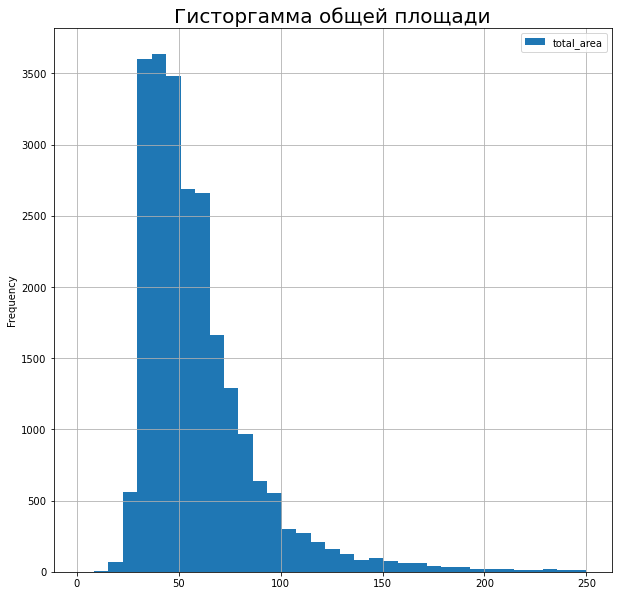

In [49]:
data.plot(y='total_area', 
          kind='hist', 
          bins=35, 
          range=(1, 250),
          figsize=(10,10),
          grid=True
)
plt.title('Гисторгамма общей площади', fontsize=20)


На гистрогаме общей площади, видим следующее:
* самое большое колличество объявления с площадью от ~30-40 м² 
* после 40 м² с увеличением площади уменьшается колличство объявлений
* объявлений с площадью более 100 м² меньше 300 штук, а более 150 м² почти нет 

Text(0.5, 1.0, 'Гисторгамма цены квариры')

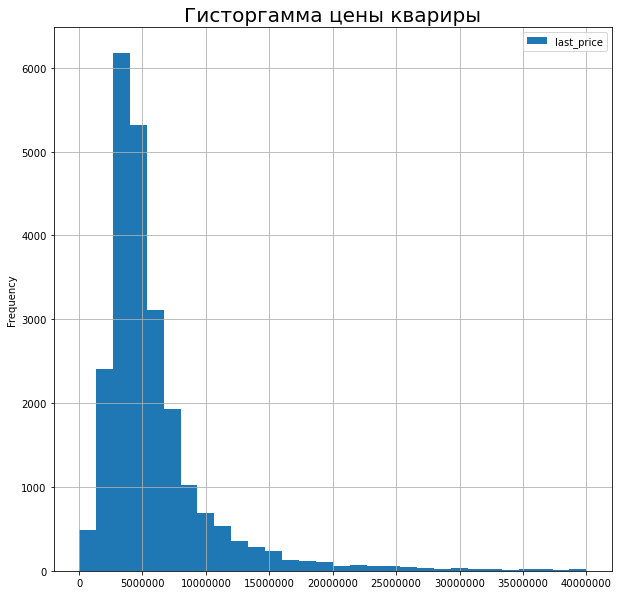

In [50]:
ax = data.plot(y='last_price', 
          kind='hist', 
          bins=30, 
          range=(1, 40000000),
          figsize=(10,10),
          grid=True
)
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Гисторгамма цены квариры', fontsize=20)


Гистограмма цены имееют схожу структуру с площадью, мы иммем резкий пик и снижение, стремящееся к нулю:
* наибольшее колличество объявлений в диапазоне ~3,5 - 4 млн
* после 4 млн с увеличением цены уменьшается колличество объявлений
* объявлений со стоимостью жилья больше 15 млн почти нет

Text(0.5, 1.0, 'Гисторгамма числа комнат')

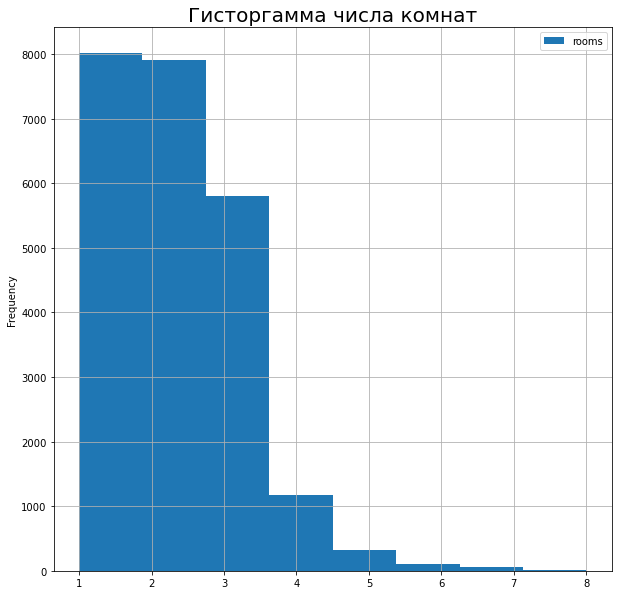

In [51]:
data.plot(y='rooms', 
          kind='hist', 
          bins=8, 
          range=(1, 8),
          figsize=(10,10),
          grid=True
)
plt.title('Гисторгамма числа комнат', fontsize=20)

Гистограма числа комнат немного отличается от предыдущих, а именно тем, что начинается с пикового значения и далее стремится к нулю:
* самый популярные однокомнатные квартиры, примерно 8000 объявлений
* на втором месте двухкоментые квартиры, примерно 79000 объявлений
* трехкоментые квартиры примерно 5800 объявлений
* после трехкоментаных квартир идёт резкий спад, так, четырехкоментных квартир чуть более тысячи, 5ю комнатами около 300, а с 6ю и более почти нет

Text(0.5, 1.0, 'Гисторгамма высоты потолков')

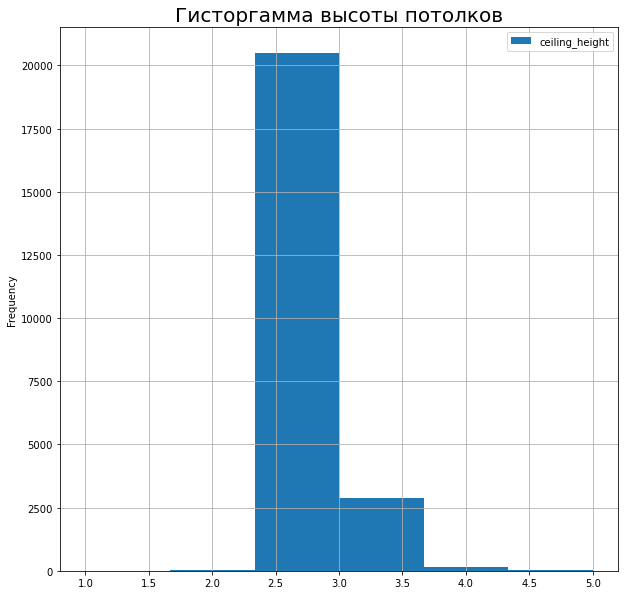

In [52]:
data.plot(y='ceiling_height', 
          kind='hist', 
          bins=6, 
          range = (1, 5),
          figsize=(10,10),
          grid=True
)
plt.title('Гисторгамма высоты потолков', fontsize=20)

Из гистограммы высоты потолков, делаем следующие выводы:
* основнаю масса лежит в диапазоне от 2,35 метров до 3х метров, более 20000 объявлений
* объявлений с высотой потолков от 3х до 3, 7 метров, около 25000
* объявлений с высотой менее 2,35 и более 3,7 метров почти нет


### Изучение времени продажи

Text(0.5, 1.0, 'Гисторгамма времени продажи')

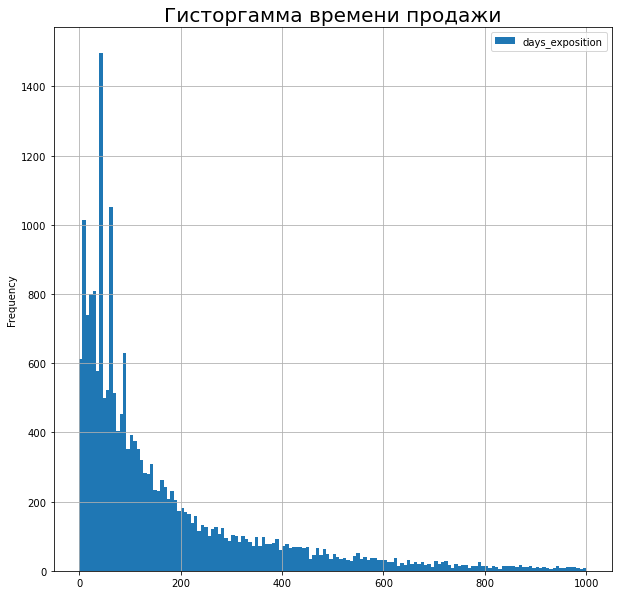

In [53]:
data.plot(y='days_exposition', 
          kind='hist', 
          bins=150, 
          range = (0, 1000),
          figsize=(10,10),
          grid=True
)
plt.title('Гисторгамма времени продажи', fontsize=20)


Для построения графика мы использовали: данные из столбца `days_exposition` - сколько дней было размещено объявление (от публикации до снятия), причины снятия объявления могут разные: 
самая главная, которая интересна в нашем исследовании - это успешная продажа, но также не стоит забывать, что объявление могло быть снято и по причине того, что пользователь просто передумал продавать, т.к. в тех документации не указана причина снятия с объявления будем считать, что они были сняты по причине продажи.

Итак, на гистограмме мы видим, что в большинстве объявления снимаются с продажи в диапазоне от 0 до 200 дней, изучим подробнее эту выборку и выделим интервал с быстрыми продажами: 

Text(0.5, 1.0, 'Гисторгамма времени продажи от 0 до 200 дней')

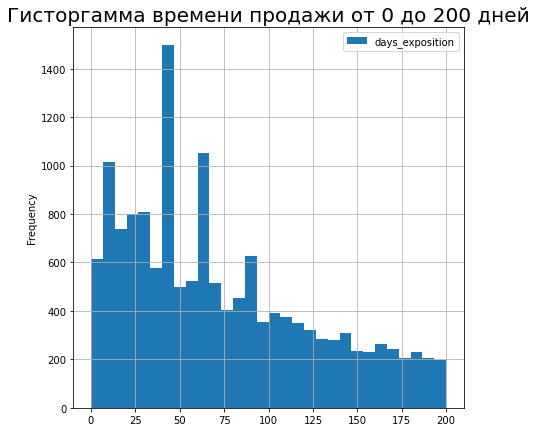

In [54]:
data.plot(y='days_exposition', 
          kind='hist', 
          bins=30, 
          range = (0, 200),
          figsize=(7,7),
          grid=True
)
plt.title('Гисторгамма времени продажи от 0 до 200 дней', fontsize=20)

Здесь хорошо виден период быстрых продаж, от 0 до 25 дней, самые быстрые менее 15 ти дней, отметим также пиковое значение, как на этой, так и общей 40-45 дней - время за которое наиболее часто продают квартиры. 

Узнаем медиану и среднюю для продаж: 

In [55]:
print('Среднее время продажи:', data['days_exposition'].mean())
print('Медианное время продажи:',data['days_exposition'].median())

Среднее время продажи: 368.96620505653664
Медианное время продажи: 124.0


Показатели сильно отличаются от выявленного наиболее популярного диапазона продаж. Построим диаграмму размаха, что бы опредлить выбросы:

(-100.0, 1500.0)

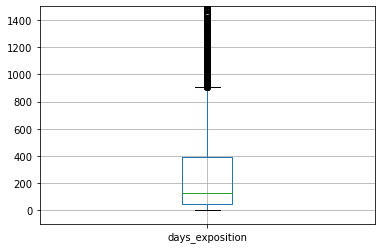

In [56]:
data.boxplot('days_exposition')
plt.ylim(-100, 1500)

Видим, что большая часть значений лежит в диапозоне от 0 до 400, а медиана смешена вниз из-за выбросов на отметке в 900. Отфильтруем объявления с очень большими значениями, построим новую диаграмму, подсчитаем медиану и среднюю:

Среднее время продажи без анамалий: 162.12416375436845
Медианное время продажи без анамалий: 92.0


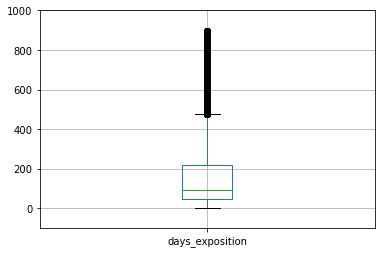

In [57]:
good_data = data.query('days_exposition < 900')
good_data.boxplot('days_exposition')
plt.ylim(-100, 1000)
print('Среднее время продажи без анамалий:', good_data['days_exposition'].mean())
print('Медианное время продажи без анамалий:',good_data['days_exposition'].median())

Теперь диаграмма имеет более правдобный вид, типиные значения находятся до 210, в размах попадают значения от 210 до 420 их отнесем к затянутым продажам. 210 дней - это примерно 7 месяцев, довольно долго, но мы имеем дело с продажей недвжимости, а на покупку жилья влияет соотношение множества факторов: цена, расположение, состояние и другие из такого большого разнообразия могут быть не самые удачные "варианты" для покупки, поэтому допускаем, что продажи могут длиться 7 месяцев, год и более. Проверим какое отношение составляют "затянутые" продажи ко всем:

In [58]:
len(data['days_exposition']) / len(good_data.query('days_exposition > 210')) 

4.557614360162131

Отношение 4, 5 - вполне допустимо для нашего исследования. Подведем итоги:
* менее 25 дней - быстрые продажи
* 40 - 45 дней - наиболее типичное время для продажи
* 210 дней и более - затянутые продажи
* 162 - медианное время продажи
* 92 - среднее время продажи квартиры

### Обработка выбивающихся значений и анамлий

Во время выполнения проекта мы уже обращали внимание на редкие значения. Вернемся к ним еще раз. Занесем их в новую таблицу и удалим из основной.
Выведем еще раз на экран таблицу с числовых описанием данных:

In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,23613.00,6540555.46,10901722.74,12190.00,3400000.00,4650000.00,6799000.00,763000000.00
total_area,23613.00,60.34,35.65,12.00,40.00,52.00,69.80,900.00
rooms,23613.00,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,23613.00,2.77,0.99,1.00,2.60,2.71,2.79,100.00
floors_total,23613.00,10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,23613.00,34.66,22.42,2.00,19.00,30.00,42.20,409.70
floor,23613.00,5.88,4.87,1.00,2.00,4.00,8.00,33.00
kitchen_area,23613.00,10.60,6.12,1.30,7.00,9.10,12.00,112.00
balcony,23613.00,0.59,0.96,0.00,0.00,0.00,1.00,5.00
center_nearest,23613.00,26266.46,23164.03,181.00,10914.00,14995.00,35248.00,65969.00


**last_price**

В первом же столбце встречаем  большое максимальное значение в 763 миллиона опечатка это или  действительно в Санкт-Петербурге может стоит квартира. Возможны оба варианта, но сколько еще квартир стомостью более полумиллиарда, установим границу цены для квартиры что бы изучить данные в 120 миллионов. 

In [60]:
data.query('last_price > 120000000').sample(frac=0.5).head(10)

,last_price,total_area,publication_date,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,days_exposition,center_nearest_group,square_meter_price,weekday_public,month_public,year_public,weekday_public_name,floor_category,living_to_total,kitchen_to_total
16461,245000000,285.70,2017-04-10,6,3.35,7,182.80,4,29.80,0,...,249,рядом с центром,857542.88,0,4,2017,пн,другой,0.64,0.10
14706,401300000,401.00,2016-02-20,5,2.60,9,204.00,9,24.00,3,...,393,центр,1000748.13,5,2,2016,сб,последний,0.51,0.06
13864,130000000,231.00,2015-08-13,6,3.60,6,148.00,4,12.00,0,...,467,центр,562770.56,3,8,2015,чт,другой,0.64,0.05
7857,150000000,230.00,2017-10-25,8,2.86,8,220.00,8,44.40,0,...,135,рядом с центром,652173.91,2,10,2017,ср,последний,0.96,0.19
4996,124000000,124.50,2017-10-12,4,3.00,4,67.20,2,20.00,0,...,45,центр,995983.94,3,10,2017,чт,другой,0.54,0.16
16647,122000000,145.00,2017-04-25,3,3.30,6,36.00,2,72.00,0,...,335,рядом с центром,841379.31,1,4,2017,вт,другой,0.25,0.50
3117,140000000,631.00,2019-03-30,7,2.79,5,367.88,5,60.00,0,...,1581,рядом с центром,221870.05,5,3,2019,сб,последний,0.58,0.10
12859,140000000,631.20,2019-04-09,7,3.90,4,322.30,4,19.50,1,...,1581,рядом с центром,221799.75,1,4,2019,вт,последний,0.51,0.03
5893,230000000,500.00,2017-05-31,6,2.95,7,291.51,7,40.00,0,...,50,рядом с центром,460000.00,2,5,2017,ср,последний,0.58,0.08
13749,240000000,410.00,2017-04-01,6,3.40,7,218.00,7,40.00,0,...,199,рядом с центром,585365.85,5,4,2017,сб,последний,0.53,0.10


Цены соответсвуют площади, это очень просторные о очень дорогие квартиры, разве что пользователь в двух местах добавил лишнии пару нулей. Создадим отдельный датасет с этими данными:

In [61]:
last_price_max = 120000000
too_big_last_price = data.query('last_price > @last_price_max')

По аналаогии поступим с остальными анамлиями, следующими обработаем 

**total_area** **kitchen_area** **living_area** 

Напомним, жилая площадь – это сумма площадей жилых комнат. Общая площадь квартиры – это сумма площадей всех комнат, составляющих квартиру, в том числе подсобных помещений, кроме лоджий, балконов, веранд и террас.[(источник)](https://dom.ria.com/articles/chto-otnositsya-k-obschej-ploschadi-a-chto-k-zhiloj-174497.html) 

видим слишком большие и маленькие ошибки в данных, установим ограничения:

* 15-150 м² total_area не менее  более 250  
* 12-200 м²  living_area не более 200
* 4-30 м² kitchen_area не более 50 м²


In [62]:
# создадим переменные для максимальных значений:
total_area_max = 250
total_area_min = 15
living_area_max = 200
living_area_min = 12
kitchen_area_max = 30
kitchen_area_min = 4 
#создадим отдельные таблицы для анамалий:
too_big_total_area = data.query('total_area > @total_area_max')
too_big_living_area = data.query('living_area > @living_area_max') 
too_big_kitchen_area = data.query('kitchen_area > @kitchen_area_max')
too_low_total_area = data.query('total_area < @total_area_min')
too_low_living_area = data.query('living_area < @living_area_min')
too_low_kitchen_area = data.query('kitchen_area < @kitchen_area_min')

**rooms**

минимальное колличество комнат не может быть нулём, заменим значения на 1, вероятнее всего это студии или апартаменты, для максимального колличества комнат установим ограничение в 5

In [63]:
data.loc[data['rooms'] < 1, 'rooms'] = 1
max_rooms = 5 
too_much_rooms = data.query('rooms > @max_rooms')

**ceiling_height** 

установим границы для потолков не более 4 и не менее 2.2 метров

In [64]:
min_ceiling_height = 2.2
max_ceiling_height = 4
too_big_ceiling_height = data.query('ceiling_height > @max_ceiling_height')
too_low_ceiling_height = data.query('ceiling_height < @min_ceiling_height')

**floors_total** 

архитектурный облик Санкт-Петербурге вряд ли у кого то ассоциируется и большими зданиями и небоскребами. [ТОПовые по высоте начинаются](https://m2.market/news/blog/vse-vyshe-i-vyshe/) с 24го этажа, токое ограничение и установим  

In [65]:
max_floors_total = 24 
too_much_floors_total = data.query('floors_total > @max_floors_total')

**days_exposition** 

в изучении времени продаж установили границу в виде 420 дней, остальные нетепично долгие, уберем их



In [66]:
too_much_days_exposition = 420 
too_much_days_exposition = data.query('days_exposition > @too_much_days_exposition')

**balcony**

Видим, максимальное колличество балконов в 5 штук

Посмотрим сколько таких объявлений:

In [67]:
len(data.query('balcony > 3'))

487

Квартиры с 3мя балконами - это уже большая редкость, а тут мы имеем и квартиры и с 4мя и с 5ю штуками

*Гипотеза: данная ошибка не похожа на обычную опечатку, т.к. встречаются 2 разных значения, предположим, что пользователи имели ввиду площадь своего балкона, т.к. перед этим заполняли такие параметры как общая и жилая площадь*

Заменим колличество балконов больше 3х на 1:

In [68]:
data.loc[data['balcony'] > 3, 'balcony'] = 1 

Все столбцы с анамилиями были обработаны, поместим их в одну таблицу

In [69]:
# методом concat() обеъеденим все таблицы с анамалиями
rare_ad = pd.concat([too_big_last_price,
                     too_big_total_area,
                     too_big_living_area,
                     too_big_kitchen_area,
                     too_much_rooms,
                     too_big_ceiling_height,
                     too_low_ceiling_height,
                     too_much_days_exposition,
                     too_low_total_area,
                     too_low_living_area,
                     too_low_kitchen_area]
)
# возможно что в анамальные значения объявление попало по нескольким критерием, удалим дубликаты
rare_ad = rare_ad.drop_duplicates()
 

Выведем полчившюуся таблицу на экран:

In [70]:
rare_ad.head()

,last_price,total_area,publication_date,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,days_exposition,center_nearest_group,square_meter_price,weekday_public,month_public,year_public,weekday_public_name,floor_category,living_to_total,kitchen_to_total
793,135000000,310.00,2018-05-22,4,3.30,5,250.00,2,50.00,0,...,342,рядом с центром,435483.87,1,5,2018,вт,другой,0.81,0.16
1026,155000000,310.00,2018-10-12,5,5.30,3,190.00,3,63.00,2,...,1581,рядом с центром,500000.00,4,10,2018,пт,последний,0.61,0.20
1436,330000000,190.00,2018-04-04,3,3.50,7,95.00,5,40.00,0,...,233,центр,1736842.11,2,4,2018,ср,другой,0.50,0.21
1928,125000000,224.50,2017-01-24,4,2.99,4,163.50,3,30.00,1,...,174,центр,556792.87,1,1,2017,вт,другой,0.73,0.13
2243,130278280,304.00,2015-07-24,5,3.11,9,177.24,7,58.69,0,...,599,рядом с центром,428546.97,4,7,2015,пт,другой,0.58,0.19


В таблице были собраны все анамалии, её можно будет использовать в дальнейшем для работы с редкими значениями.

Удалим из общей табицы анамалбные и редкие значения:

In [71]:
#удалим по индексам
data = data[~data.index.isin(rare_ad.index)]

Проверям результат:

In [72]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
last_price,17528.00,5460012.89,4401579.67,430000.00,3370000.00,4450000.00,6200000.00,98000000.00
total_area,17528.00,55.44,23.57,20.00,39.00,50.00,65.00,250.00
rooms,17528.00,1.97,0.92,1.00,1.00,2.00,3.00,5.00
ceiling_height,17528.00,2.73,0.20,2.20,2.60,2.70,2.79,4.00
floors_total,17528.00,10.98,6.66,1.00,5.00,9.00,16.00,60.00
living_area,17528.00,31.82,15.65,12.00,18.60,29.50,40.00,175.00
floor,17528.00,6.02,4.94,1.00,2.00,4.00,8.00,33.00
kitchen_area,17528.00,9.83,3.92,4.00,7.00,9.00,11.40,30.00
balcony,17528.00,0.54,0.77,0.00,0.00,0.00,1.00,3.00
center_nearest,17528.00,26520.80,22893.42,208.00,11413.75,15144.00,34847.00,65969.00


Все установленные ограничения работают, имеем таблицу с "чистыми данными", а также таблицу с анамилями

### Изучение факторов, влияющих на конечную стоимость

Для изучения зависимости зависмости одной величины от другой для начала выведем таблицу корреляции между интересующими нас величиными

In [73]:
# создадим таблицу с интересующими нам величинами
corr_data = data[['last_price','total_area', 'rooms', 'center_nearest']]
# выведем таблицу с корреляцией на экран
corr_data.corr().head(1)

,last_price,total_area,rooms,center_nearest
last_price,1.00,0.72,0.43,-0.38


Видим, что цена имеет положительную корреляцю с плщадью квартиры, колличеством комнат и отрицательную с удаленностью от центра, т.е. 
* с увеличеним площади, увеличивается и цена
* с увеличеним колличества комнат, увеличивается и цена
* с увелечением удаленности от центра - цена уменишается

Данные выглядит правдоподобно, посмотрим, как отображается зависимость на графиках

Text(0.5, 1.0, 'Зависимость цены от общей площади')

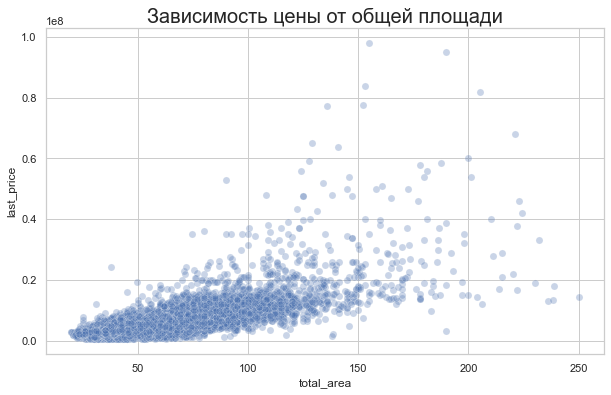

In [74]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=data, x="total_area", y="last_price", s=50, alpha=0.3)
plt.title("Зависимость цены от общей площади", fontsize=20)

На графике отображена прямая корреляция, но не на всех учатках, если взять отрезок с самым большим скоплением от 25 м² до 150 м², то видим что он плавно растёт вверх по цене(за исклбючением некоторых выбивающихся случаев), а после 150 м² корреляцию проследить трудно, все случае уникальны и будут зависиеть от множество других факторов. Эти данные можно было бы "срезать" на предыдущем этапе работы, но таким образом, мы смогли проследить начала перехода к анамальным и уникальным значениям в таблице 

Text(0.5, 1.0, 'Зависимость цены от колличества комнат')

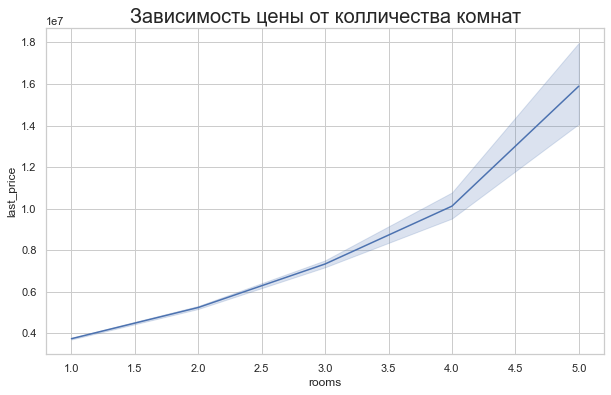

In [75]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x="rooms", y="last_price")
plt.title("Зависимость цены от колличества комнат", fontsize=20)

Здесь всё очевидно, с увеличнем колличества комнат растёт и цена, отметим также, что переход на на 4 и более комнаты самый резкий по увелечению цены 

Text(0.5, 1.0, 'Зависимость цены от удаленности к центру')

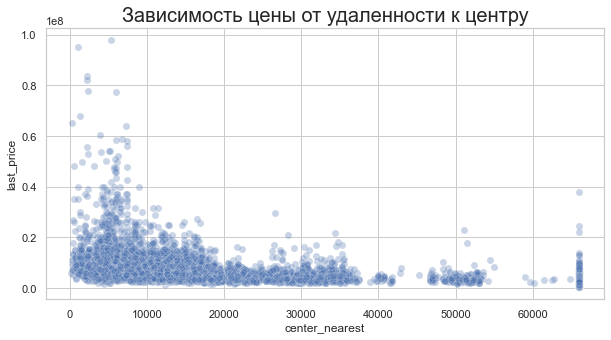

In [76]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x="center_nearest", y="last_price", s=50, alpha=0.3)
plt.title("Зависимость цены от удаленности к центру", fontsize=20)

В таблице корреляции мы не видим явной взаимосвязи, есть множество уникальных случаев, отметим, что самые дорогие квартиры все же расположены ближе всего к центру(0 - 7000 м), после центра взимосвязь не прослеживается, имеем множество случаев схожих по цене как в предлелах ближнего центра, так и в областях, но и далеко загородом есть очень интесные предложения за большую цену

Text(0.5, 1.0, 'Зависимость цены от удаленности по группам')

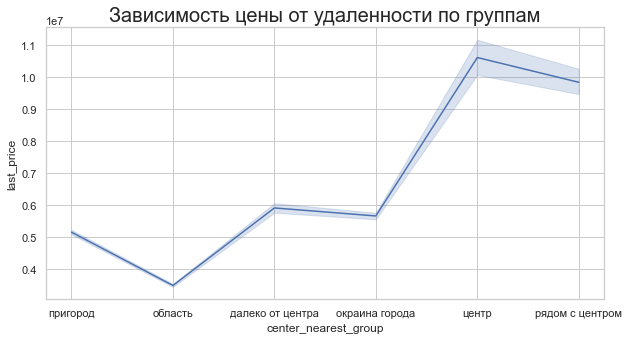

In [77]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data, x="center_nearest_group", y="last_price")
plt.title("Зависимость цены от удаленности по группам", fontsize=20)

На графике разделенном на группы взаимосвязь прослеживается намного лучше:
* квартиры в центре и рядом с ним самые дорогие
* квартиры расположные ближе к окраине города стоят намного дешевле 
* квартиры в области самые дешевые

Но не будем забывать об уникальных случаях которые мы могли увидеть на предыдущем графике

Text(0.5, 1.0, 'Зависимость от расположения этажа')

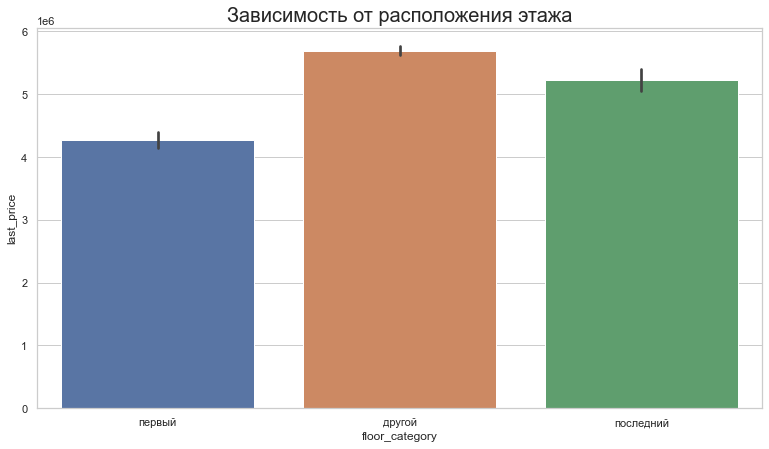

In [78]:
plt.figure(figsize=(13,7))
sns.set_theme(style="whitegrid")
sns.barplot(data=data, x="floor_category", y="last_price")
plt.title("Зависимость от расположения этажа", fontsize=20)

Видим, что квартиры на первом этаже самые дешевые. Если не важно на каком этаже, лишь бы не первом, то стоит выбрать последний этаж - на нём квартиры будут стоить немного дешевле, чем на других 

Text(0.5, 1.0, 'Зависимость цены от дня недели публикации')

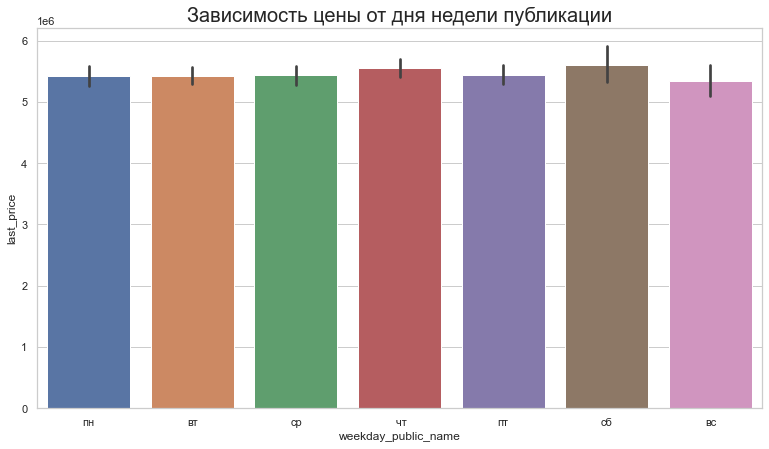

In [79]:
plt.figure(figsize=(13,7))
sns.barplot(data= data.sort_values(by='weekday_public'), x="weekday_public_name", y="last_price")
plt.title("Зависимость цены от дня недели публикации", fontsize=20)

По графику можем сказать о том, что если вы захотите купить квартиру, то просмотр "свежих" объявлений в воскресенье с чуть большей вероятностью поможет найти предложения по самой низкой цене, что нельзя сказать о субботе - это день можно пропустить, если устали "скролить" объявления

Text(0.5, 1.0, 'Зависимость цены от месяца публикации')

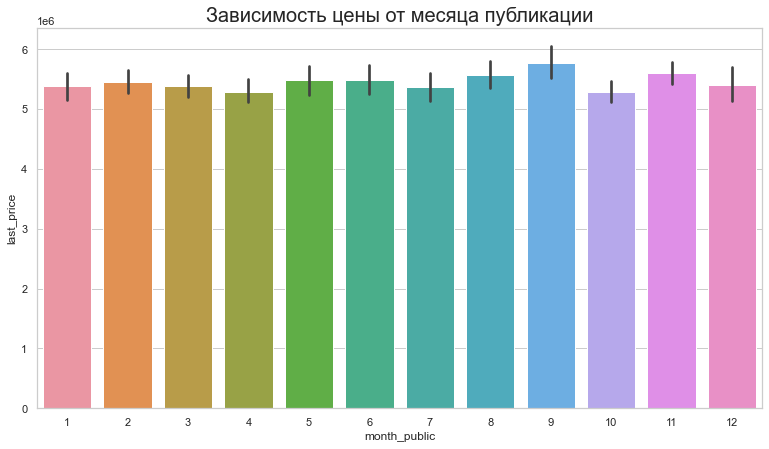

In [80]:
plt.figure(figsize=(13,7))
sns.barplot(data=data, x="month_public", y="last_price")
plt.title("Зависимость цены от месяца публикации", fontsize=20)

Сентябрь - не самое удачно время для покупки квартиры, обычно в этот месяц они дороже всего, лучше подождать месяц и заняться поиском квартиры в октябре, там получится встреть квартиры по самой низкой цене

Text(0.5, 1.0, 'Зависимость от года публикации')

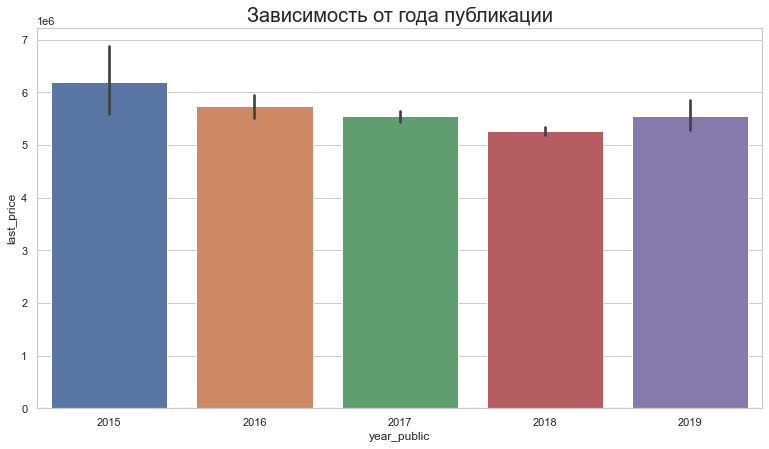

In [81]:
plt.figure(figsize=(13,7))
sns.barplot(data=data, x="year_public", y="last_price")
plt.title("Зависимость от года публикации", fontsize=20)

В период с 2015 по 2018 годь наблюдалось постоянно сняжения стоиомости квартиры из года в год, а вот в 2019 цены снова выросли и стали наровне с 2016м годом.

### Опредление населенных пунктов с набиольшим числом объявлений. Выявление насленных пунктов с самой высокой и низкой стоимостью жилья

Создадим сводную таблицу с интересующими нас данными

Text(0.5, 1.0, 'ТОП н.п. по колличеству объявлений')

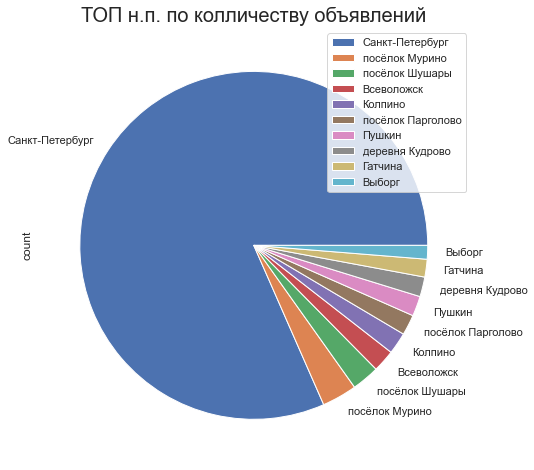

In [82]:
#создадим сводную таблицу
top_locality = data.pivot_table(index = 'locality_name', values = 'square_meter_price',  aggfunc=['count', 'mean'])
#переимениум столбцы
top_locality.columns = ['count', 'mean']
#отсортируем в порядке убывания по колличеству 
top_locality = top_locality.sort_values(by='count', ascending =False)
#сделаем срез с ТОПовыми по колличеству объявлений населенными пунктами
top_locality = top_locality[0:10]
top_locality.plot(y='count', kind='pie', figsize=(8,8))
plt.title("ТОП н.п. по колличеству объявлений", fontsize=20)


В Санкт-Петербурге, ожидаемо, больше всего объявлений. Посмотри по табличным значениям населенные пункты с самой большой ценой за квадратный метр

Text(0.5, 1.0, 'ТОП н.п. по средней цене за квадратный метр')

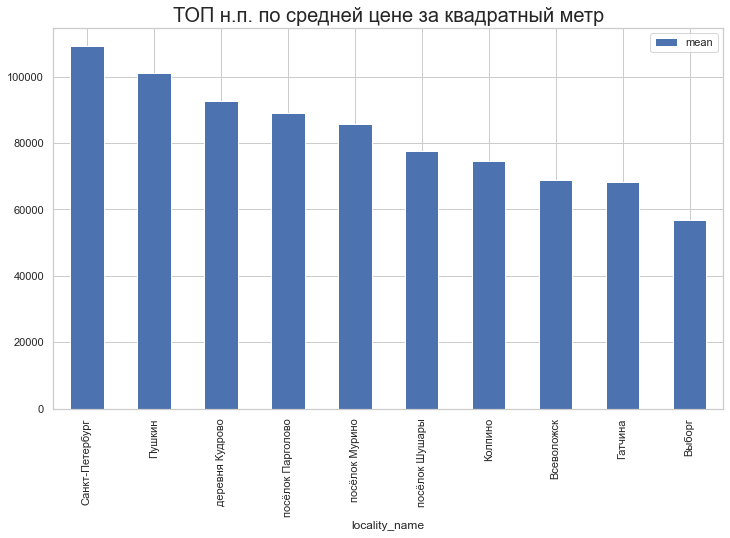

In [83]:
top_locality.sort_values(by='mean', ascending=False).plot(y='mean', kind='bar', figsize=(12,7))
plt.title("ТОП н.п. по средней цене за квадратный метр", fontsize=20)

Итак, видим, что самая дорогая цена за квадратный метр в Санкт-Петербурге более 110000 за м², далее идут:
- Пушкин - чуть более 100000 за м²
- деревня Кудрово около 92000 за м²

Самое дешевое жилью в Выборге примерно 56000 за м²

Стоит отметить, что есть и более дешвевое жильё, но оно не вошло в выборку, так как имеет слишком маленькую выборку по колличество всех объявлений и было бы некорректно сравнивать их с другими населенными пунктами.

Точные значения приведем в таблице ниже:

In [84]:
top_locality.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,11527,109212.61
Пушкин,263,101107.15
деревня Кудрово,259,92784.41
посёлок Парголово,268,88950.61
посёлок Мурино,459,85604.48
посёлок Шушары,363,77552.48
Колпино,285,74664.07
Всеволожск,292,68764.16
Гатчина,233,68119.05


### Опредление центральной зоны. Подсчёт средней цены для каждого киллометра от центра. 

In [85]:
data

,last_price,total_area,publication_date,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,days_exposition,center_nearest_group,square_meter_price,weekday_public,month_public,year_public,weekday_public_name,floor_category,living_to_total,kitchen_to_total
1,3350000,40.40,2018-12-04,1,2.78,11,18.60,1,11.00,2,...,81,пригород,82920.79,1,12,2018,вт,первый,0.46,0.27
5,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,9.10,0,...,55,область,95065.79,0,9,2018,пн,другой,0.47,0.30
8,2900000,33.16,2018-05-23,1,2.68,27,15.43,26,8.81,0,...,189,область,87454.76,2,5,2018,ср,другой,0.47,0.27
9,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,6.50,2,...,289,пригород,88524.59,6,2,2017,вс,другой,0.71,0.11
10,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,8.50,0,...,137,пригород,127525.25,3,11,2017,чт,другой,0.51,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,9.10,2,...,29,пригород,100566.57,2,2,2018,ср,другой,0.46,0.26
23690,5500000,52.00,2018-07-19,2,2.79,5,31.00,2,6.00,0,...,15,рядом с центром,105769.23,3,7,2018,чт,другой,0.60,0.12
23692,1350000,30.00,2017-07-07,1,2.79,5,17.50,4,6.00,0,...,413,область,45000.00,4,7,2017,пт,другой,0.58,0.20
23693,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,8.00,0,...,239,область,73717.95,4,8,2016,пт,другой,0.64,0.13


Создадим столбец с расстоянием до центра в килоометрах

In [86]:
# разделим на тысячу, что бы перевести метры в киллометры
data['center_nearest_km'] = data['center_nearest'] / 1000
# округлим
data['center_nearest_km'] = data['center_nearest_km'].round()

<AxesSubplot:title={'center':'График зависимости цены по уадленности от центра'}, xlabel='center_nearest_km', ylabel='last_price'>

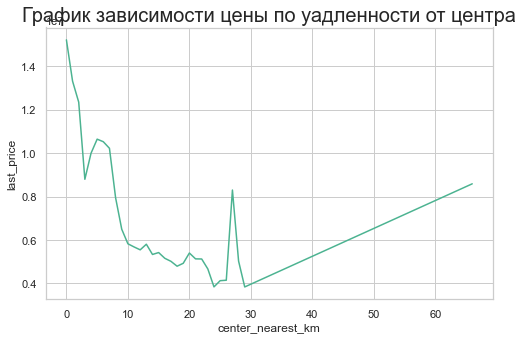

In [87]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_data_pivot = spb_data.pivot_table(index = 'center_nearest_km', values = 'last_price')
plt.figure(figsize=(8,5))
plt.title("График зависимости цены по уадленности от центра", fontsize=20)
sns.lineplot(data=spb_data_pivot, x="center_nearest_km", y="last_price", color='#4CB391')

График начинается с пикового значения и резко стремится вниз, что значит, что средняя стомость за м² падает практически с каждым метром, удаляясь от центра. Далее видим резкий но корткий рост, на расстоение примерно 5 км и снова резкий спад, таким образом, можно обозначить центр - это квартиры на расстояние от 0 до 10 км.


### Выделение сегмента квартир в центре. Анализ данной территории. 

Создадим таблицу с квартирами в центре в Санкт-Петербурге и выведем основные параметры для этого сегмента:

In [88]:
#осортируем квартир в центре до 4 км
spb_center_data = spb_data.query('center_nearest_km < 10')
#создадим таблицу с нужными данными для исследования
spb_center_data = (spb_center_data[['last_price', 
                                    'total_area',
                                    'rooms',
                                    'ceiling_height',
                                    'floors_total',
                                    'floor',
                                    'publication_date',
                                     'year_public',
                                     'month_public',
                                     'weekday_public',
                                    'center_nearest',
                                    'floor_category']]
                  )
#выведем основные пармаетры для квартир в центре Санкт-Петербурга
print('Колличество объявлений в центре:', spb_center_data.shape[0])
print('Средняя цена:')
print('по всем данным -', round(data['last_price'].mean())) 
print('для центра -', round(spb_center_data['last_price'].mean())) 
print('Средняя площадь:')
print('по всем данным -', round(data['total_area'].mean(),2))
print('для центра -', round(spb_center_data['total_area'].mean(),2))
print('Среднее колличество комнат:')
print('по всем данным -', round(data['rooms'].mean()))
print('для центра -', round(spb_center_data['rooms'].mean()))
print('Среднее высота полотков:')
print('по всем данным -', round(data['ceiling_height'].mean(),2))
print('для центра -', round(spb_center_data['ceiling_height'].mean(),2))


Колличество объявлений в центре: 2996
Средняя цена:
по всем данным - 5460013
для центра - 9596364
Средняя площадь:
по всем данным - 55.44
для центра - 72.77
Среднее колличество комнат:
по всем данным - 2
для центра - 2
Среднее высота полотков:
по всем данным - 2.73
для центра - 2.91


Видим, что основные параметры для центра Санкт-Петербурга отличаются в большую сторону. Было очевидно, что квартиры там дороже, но также они заметно больше, чем все остальные.

Посмотрим как зависит цена в центре квартиры от площади, числа комнат, высоты полков, этажа, удалённости от центра на диаграмме матрицы рассения:

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='ceiling_height'>,
        <AxesSubplot:xlabel='total_area', ylabel='ceiling_height'>,
        <AxesSubplot:xlabel='rooms', ylabel='ceiling_height'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel=

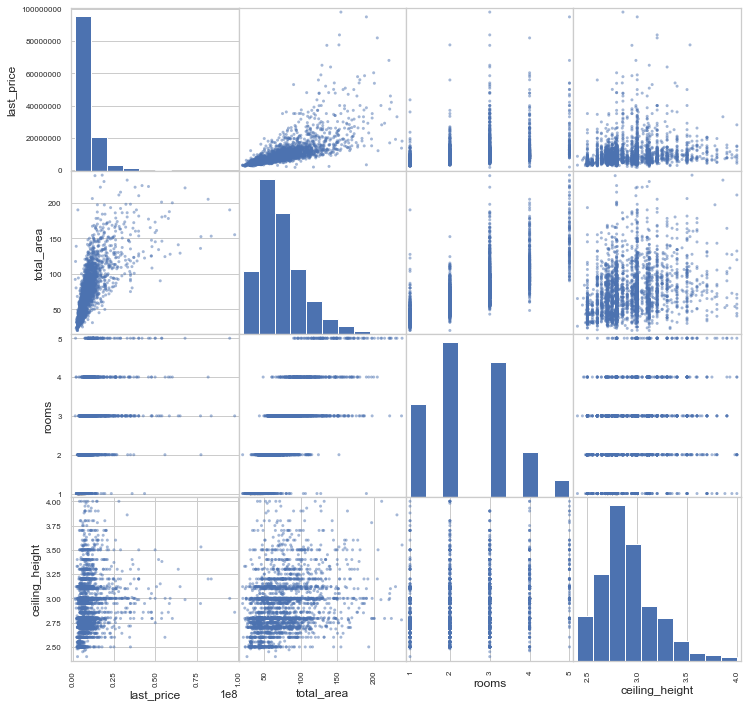

In [89]:
#создадим таблицу для некатегориональных значений:
spb_center_data_matrix = spb_center_data[['last_price', 'total_area', 'rooms', 'ceiling_height']]
#ведеи матрицу диаграмм рассения на экран
pd.plotting.scatter_matrix(spb_center_data_matrix, figsize=(12, 12)) 

Сделаем выводы по графикам:

1. Зависимость цены от общей площади. (2я ячейка в 1м стобце). Наблюдаем прямую корреляцию, с ростом площади также растёт и цена. Также видим большое скопление точек на участке от ~ 25 млн до ~135 м² - это означает, что в этом диапазоне мы имеем наибольшее колличество объявлений от пользователей. Далее график ведет себя чуть более хаотично, есть нетепичные объявления  с высокой ценой, но относительно небольшой площадью, так и с нетепично высокой ценой, при нетепично большой площади, что говорит нам о том, что цена для некоторых квартир, не всегда будет обусловлена её площадью.

2. Заивсимость цены от колличества комнат. (3я ячейка в 1м столбце). На графике видим как порог минимальной стомости квартиры постепенно растёт с увелечнием комнат, и здесь видно, что чаще всего мы можем наблюдать нетепично большую стоимости для заданного колличество комнат, нежели низкую.

3. Зависимость цены от высоты полоков. (4я ячейка в 1м столбце). Взимосвязь на этом графике не прослиживается, что говорит нам о том, что высота практически не влияет на стомость квартиры.

Исследуем корреляцию величин кореляцию этих величин, на тепловой карте, а также изучим зависимость от удалённости от центра и дате размещения: по месяцу, году и дню недели

Text(0.5, 1.0, 'Таблица корреляции для центра Санкт-Петербурга')

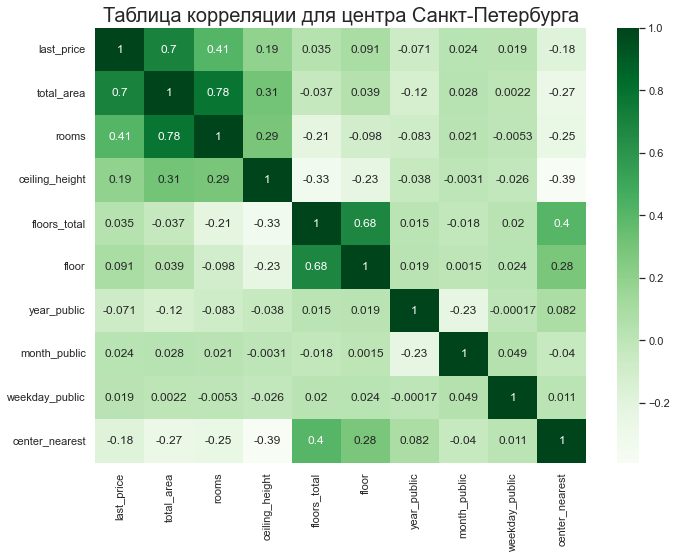

In [90]:
plt.figure(figsize=(11,8))
sns.heatmap(spb_center_data.corr(), annot = True, cmap='Greens')
plt.title("Таблица корреляции для центра Санкт-Петербурга", fontsize=20)

Сделаем выводы по зависимости цены от других параметров по тепловой квартире:
1. **Плошадь**, как мы ранее убедились имеет **высокую и положительную** корреляцию со стимостью. Делаем очевидный вывод, чем больше площадь, тем дороже цена.
2. **Колличество комнат**  имеет **умеренную и положительную** корреляцию, у этого параметра она ниже чем у площади, делаем вывод, что в расчёт стомости в первую очередь учитывют площади квартиры, а не колличество в ней комнат.
3. **Высота полков**  имеет **слабую** корреляцию, но всё же имеет положительный коэффициент, что говорит нам о том, что квартира с высокими полоками, будет скорее всего дороже, чем такая же но с низкими.
4. **Номер этажа и их колличество** как некотегориональные величины **практически не влияют**, на стоимость квартиры, но всё же видим положительный коэффициент, что говорит нам о том, что на первом этажа квартиры как правило самые дешевые.
5. **Год публикации** имеет **очень низкую но отрицательную корреляцию**, это говорит нам о том, что за исследуемый период, цена на недвжиомость снижались от года к году.
6. **Взаимосвязь месяца, дня недели публикации** с ценой **отствуют**.
7. **Удаленность от центра** имеет  **слабую и отрицательную корреляцию** с ценой, что говорит нам о том, что при отдалении от центра стоимость квартир начинает снижаться.

В таблицу корреляции не вошли сравнения по категорияем построим для них отдельный график:

Text(0.5, 1.0, 'Зависимость от расположения этажа для квартир в центре')

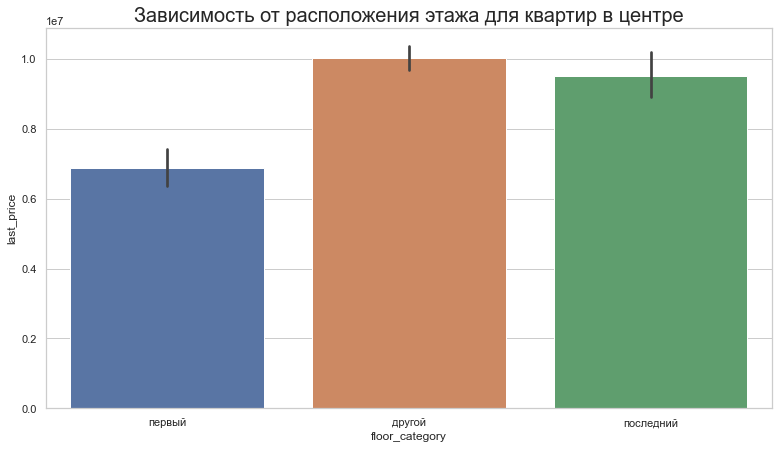

In [91]:
plt.figure(figsize=(13,7))
sns.set_theme(style="whitegrid")
sns.barplot(data=spb_center_data, x="floor_category", y="last_price")
plt.title("Зависимость от расположения этажа для квартир в центре", fontsize=20)

Топ по категорияем по сравнению с общей базы выглядит одинаково, но цены за квартиры на первом этаже еще более дешевые чем все остальные.  

Если сравнивать квартиры в центре Санкт-Петербурга со всей базой объявлений, то динамика влияния параметров на итоговую цену одинаковая, а вот сами значения будут заметно отличаться в положительную сторону к центру

## Итоги исследования

**В результате выполнения проекта были выполнены следующие задачи:**


**1. Предобработка данных** 

* название столбцов было приведено к общему стилю
* были выявлены строки с пропусками и выдвинуты гипотезы об их происхождении
 * `ceiling_height`, `living_area`, `kitchen_area`, `floors_total`, `balcony` - человеческий фактор, люди случайно пропускают эти пункты, либо просто не знают точных параметров  
 * `locality_name`, `center_nearest`, ошибка сервиса, скрипту сайта не удалось опредлить место расположения квартиры 
 * `days_exposition` - отствуие значений в связи незакрытым объявленим на сайте	
* пропуски были устранены с помощью логичных замен, на основе имеющихся значений и гипотез
* строки, в которых данные не было возможности восстановить были удалены
* типы данных приведены к формату удобному для чтения таблицы и работы с ней

**2. Добавление расчётов в таблицу**

* добавлена цена квадратного метра
* день недели(в числовом и текстовом формате), месяц, год, публикации
* добавлены категории по этажам
* соотношение жилой и общей площади, а также отношение площади к кухни к общей

**3. Обработка анамалий**

* анамальные значения были выявлены на основании стандартных значений
* часть анамалий устранена после выполнения логичных замен



**Получили следующией таблицы:**

* `data` - общая таблица объявлений в Санкт-Петербурге с обработанными/исключенными анамалиями, заполненными пропусками и необходимыми столбцами для исследования

* `rare_ad` - общая таблица с анамальными значениями

На основе графика зависимость цены от удаленности к центру, были выявлен центральный сегмент квартир в Санкт-Петербурге

* `spb_center_data` - таблица с объявлениями в центре Санкт-Петербурга
---

**4. Основные итоги исследования, закономерности и наблюдения:**

ТОП-3 населенных пунктов по колличетву объявлений:

| населенный пункт         | колличество объявлений | средння цена за м²|
|--------------------------|-----------------|----------------
| **Санкт-Петербург**	       | 11527        |   109 212       | 
| **посёлок Мурино**	       | 459          |     85 604     | 
| **посёлок Шушары**	       | 363          |       77 552   | 

Сравнения квартир в центральном сегменте показало, что зависмоть цены от других параметров одинаково, а вот сами основные показателя заметно больше:


| **выборка**  | кол-во объявлений | средняя цена | средняя площадь | среднее кол-во комнат|средняя высота полотков | 
|--------------------------|-----------------|--------------------|-------------|-------------|-------------|
| **по всем данным**                   | 17528          | 5 460 013              | 55        |     2      |      2.73       |
| **центр Санкт-Петербурга**  | 2996          | 9 596 364              | 73       |   2    |         2.91     | 



**для общей площади:**
* самое большое колличество объявлений в дипазоне от 30 до 40 м
* квартиры в центре примерно в среднем в 2 раза больше, чем где-либо еще
* самое маленькое колличество объявлений у квартир с площадью менее 30 более 100 м

**для цены:**
* цена в большей степени зависит от общей площади и колличества комнат
* чем дальше от центра - тем квартиры дешевле
* наибольшее колличество объявлений в диапазоне ~3,5 - 4 млн
* цена за квадратный метр в Санкт-Петербурге в среднем в 2 раза больше, чем в областях
* квартиры с ценой менее 2 млн и более 120 - самые редкие

**для скорости продаж:**
* менее 25 дней - быстрые продажи
* 40 - 45 дней - наиболее типичное время для продажи
* 210 дней и более - затянутые продажи
* скорость продаж зависит от совокупности всех факторов, поэтому в ряде случаев, они могут затянться на длительный срок

**для колличества комнат:**
* чаще всего продают одокомнатные и двухкомнатые квартиры
* в центре преобладают многокомнатые квартиры

**для расположения квартиры по этажам:**
* самые дешевые квартиры находятся на первом этаже
* второй по стоимости идёт последний этаж
* все остальные этажи в доме самые дорогие

**для высоты потолков:**
* высота потолков незначительно, но увеличивает стоимость квартиры
* в квартирах в центре Санкт-Петербурга самые высокие потолки

**для даты публикации:**
* дата публикации оказывает незначительное влияние на конечную стоиость
* стоимость квартир постепенно уменьшался в период с 2015 по 2018 годы, в 2019 году был новый рост цен на недвижиость
* за исследуемый период (2015-2019г) дороже всего продавались квартиры в сентябре
* дешевле всего в октябре


